In [152]:
import numpy as np
from datetime import datetime 
import pandas as pd
#pd.core.common.is_list_like=pd.api.types.is_list_like
#import pandas_datareader as pdr
import matplotlib.pyplot as plt
#datetime 모듈에 있는 datetime 객체를 가져와라.
# => datetime 객체가 가지고 있는 다양한 함수, 속성을 사용하겠다.

시계열 데이터
-> 시간의 흐름에 따른 데이터 변화를 분석하고 싶을 때...

datetime: 날짜(date), 시간(time)을 처리하는 라이브러리

In [7]:
now1=datetime.now()
print(now1)


2019-04-16 09:21:22.116269


In [9]:
now2=datetime.today()
print(now2)

2019-04-16 09:23:17.767497


In [13]:
t1=datetime.now()
t2=datetime(2019,3,27)
t3=datetime(2019,8,2)
print(t1,t2,t3)

2019-04-16 09:24:52.493748 2019-03-27 00:00:00 2019-08-02 00:00:00


날짜 형식을 사용하면 시간 계산이 가능해 진다.

In [15]:
diff1=t1-t2
print(type(diff1))

<class 'datetime.timedelta'>


In [18]:
diff2=t2-t1
print(diff2)

-21 days, 14:35:07.506252


In [20]:
# datetime 객체로 변환 : to_datetime()
# 문자열은 시간계산이 안됨.
# 따라서, object -> datetime 변환 후 계산.

In [21]:
ebola=pd.read_csv("data/country_timeseries.csv")

In [22]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: float64(16), int64(1), object(1)
memory usage: 17.2+ KB


In [23]:
dtDate=pd.to_datetime(ebola['Date'])

In [25]:
ebola['date_dt']=dtDate

In [26]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
date_dt                122 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(16), int64(1), object(1)
memory usag

ms:10^(-3), us:10^(-6), ns:10^(-9)

In [35]:
test_df1=pd.DataFrame({
    'order_day':['01/01/15','02/01/15','03/01/15']
})
test_df1

,order_day
0,01/01/15
1,02/01/15
2,03/01/15


In [30]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 1 columns):
order_day    3 non-null object
dtypes: object(1)
memory usage: 104.0+ bytes


In [36]:
#test_df1['date_dt1']=pd.to_datetime(test_df1.order_day) #문자열 형식 => 날짜 형식으로 변환
test_df1['date_dt1']=pd.to_datetime(test_df1.order_day, format='%m/%d/%y')
# to_datetime() : '%m/%d/%y' 형태로 저장되어 있는 데이터를 default 'yyyy-mm-dd'
test_df1

,order_day,date_dt1
0,01/01/15,2015-01-01
1,02/01/15,2015-02-01
2,03/01/15,2015-03-01


In [37]:
#test_df1['date_dt1']=pd.to_datetime(test_df1.order_day) #문자열 형식 => 날짜 형식으로 변환
test_df1['date_dt2']=pd.to_datetime(test_df1.order_day, format='%d/%m/%y')
# to_datetime() : '%d/%m/%y' 형태로 저장되어 있는 데이터를 default 'yyyy-mm-dd'
test_df1

,order_day,date_dt1,date_dt2
0,01/01/15,2015-01-01,2015-01-01
1,02/01/15,2015-02-01,2015-01-02
2,03/01/15,2015-03-01,2015-01-03


In [49]:
#test_df1['date_dt1']=pd.to_datetime(test_df1.order_day) #문자열 형식 => 날짜 형식으로 변환
print(pd.to_datetime('2019/04/16', format='%Y/%m/%d'))
# to_datetime() : '%Y/%m/%d' 형태로 저장되어 있는 데이터를 default 'yyyy-mm-dd'
# format에 대문자 Y 를 사용한다는 것은 연도 날짜의 형식이 4자리로 구성되어 있다는 의미
print(pd.to_datetime('19/04/16', format='%y/%m/%d'))
print(pd.to_datetime('19/04/16/09/54/51', format='%y/%m/%d/%H/%M/%S')) #시간 H, 분 M, 초 S


2019-04-16 00:00:00
2019-04-16 00:00:00
2019-04-16 09:54:51


In [50]:
now=datetime.now()
print(now)

2019-04-16 09:57:46.459086


In [55]:
nowDate=now.strftime("%Y-%m-%d")
nowDate

'2019-04-16'

In [56]:
nowTime=now.strftime("%H:%M:%S")
nowTime

'09:57:46'

In [57]:
nowDateTime=now.strftime("%Y-%m-%d %H:%M:%S")
nowDateTime

'2019-04-16 09:57:46'

In [61]:
# datetime 객체로 변화하려는 열을 지정
#ebola=pd.read_csv("data/country_timeseries.csv")
#dtDate=pd.to_datetime(ebola['Date'])
#ebola.info()

ebola1=pd.read_csv("data/country_timeseries.csv",parse_dates=['Date']) #Data 컬럼을 datetime으로 변환시켜서 읽음.
ebola1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
Date                   122 non-null datetime64[ns]
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
dtypes: datetime64[ns](1), float64(16), int64(1)
memory usage: 17.2 KB


In [71]:
date_series=pd.Series(['2019-04-16','2019-04-17','2019-04-18'])
date_series
d1=pd.to_datetime(date_series)
print(d1[0].year)
print(d1[0].month)
print(d1[0].day)

2019
4
16


In [80]:
ebola=pd.read_csv("data/country_timeseries.csv")
ebola['date_dt']=pd.to_datetime(ebola['Date']) #Data 컬럼을 datetime으로 변환시켜서 읽음.


#ebola.info()
ebola[['Date','date_dt']].head()

,Date,date_dt
0,1/5/2015,2015-01-05
1,1/4/2015,2015-01-04
2,1/3/2015,2015-01-03
3,1/2/2015,2015-01-02
4,12/31/2014,2014-12-31


In [89]:
#3번 행 인덱스에 date_dt 컬럼에 저장된 연도를 추출
print(ebola['date_dt'][3].year)
print(ebola['date_dt'][3].month)
print(ebola['date_dt'][3].day)
#위에 기술된 코드는 인덱스로 특정 데이터를 접근해야 하기 때문에 
#dt 접근자를 이용하여 쉽게 접근이 가능함.
ebola['year']=ebola['date_dt'].dt.year
ebola.info()

2015
1
2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 20 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
date_dt                122 non-null datetime64[ns]
year                   122 non-null int64
dtypes: datetime64[n

In [90]:
#월, 일 데이터를 한 번에 추출(dt이용)해서 새로운 열(month, day)로 축
ebola['month']=ebola['date_dt'].dt.month
ebola['day']=ebola['date_dt'].dt.day
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
Date                   122 non-null object
Day                    122 non-null int64
Cases_Guinea           93 non-null float64
Cases_Liberia          83 non-null float64
Cases_SierraLeone      87 non-null float64
Cases_Nigeria          38 non-null float64
Cases_Senegal          25 non-null float64
Cases_UnitedStates     18 non-null float64
Cases_Spain            16 non-null float64
Cases_Mali             12 non-null float64
Deaths_Guinea          92 non-null float64
Deaths_Liberia         81 non-null float64
Deaths_SierraLeone     87 non-null float64
Deaths_Nigeria         38 non-null float64
Deaths_Senegal         22 non-null float64
Deaths_UnitedStates    18 non-null float64
Deaths_Spain           16 non-null float64
Deaths_Mali            12 non-null float64
date_dt                122 non-null datetime64[ns]
year                   122 non-null int64
month                  122 no

In [103]:
#에볼라 최초 발병일 계산
# ebola.iloc[-5:, :5] #하위 5개, 왼쪽부터 5번째 컬럼까지
# ebola['Date'].tail(1)
print(ebola.date_dt.min()) #date_dt 중 에서 가장 과거인 데이터를 추출
print(ebola.date_dt.max()) #date_dt 중 에서 가장 최신인 데이터를 추출
print(ebola.date_dt.max() - ebola.date_dt.min() ) # 에볼라 바이러스 발병 일수


2014-03-22 00:00:00
2015-01-05 00:00:00
289 days 00:00:00


In [108]:
ebola['outbreak_d']=ebola.date_dt - ebola.date_dt.min() # 에볼라 바이러스 경과된 날짜
ebola[['Date','Day','outbreak_d']].head() # Day와 outbreak_d는 같은 값을 가진다.


,Date,Day,outbreak_d
0,1/5/2015,289,289 days
1,1/4/2015,288,288 days
2,1/3/2015,287,287 days
3,1/2/2015,286,286 days
4,12/31/2014,284,284 days


In [109]:
ebola[['Date','Day','outbreak_d']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 3 columns):
Date          122 non-null object
Day           122 non-null int64
outbreak_d    122 non-null timedelta64[ns]
dtypes: int64(1), object(1), timedelta64[ns](1)
memory usage: 2.9+ KB


In [113]:
#파산한 은행의 개수 계산
banks=pd.read_csv("data/banklist.csv")
banks.head()
#banks.info()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,15-Dec-17,20-Dec-17
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,13-Oct-17,20-Oct-17
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",26-May-17,26-Jul-17
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,5-May-17,26-Jul-17
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,28-Apr-17,5-Dec-17


In [123]:
#파산한 은행의 개수 계산
banks=pd.read_csv("data/banklist.csv", parse_dates=['Closing Date', 'Updated Date'])

banks['Closing Date'].dt.year.unique()
banks['Closing_quarter'], banks['Closing_year']=banks['Closing Date'].dt.quarter, banks['Closing Date'].dt.year
banks.head()

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date,Closing_quarter,Closing_year
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,2017-12-15,2017-12-20,4,2017
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,2017-10-13,2017-10-20,4,2017
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb",2017-05-26,2017-07-26,2,2017
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,2017-05-05,2017-07-26,2,2017
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,2017-04-28,2017-12-05,2,2017


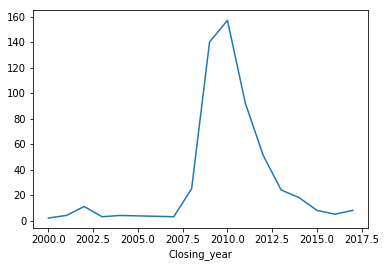

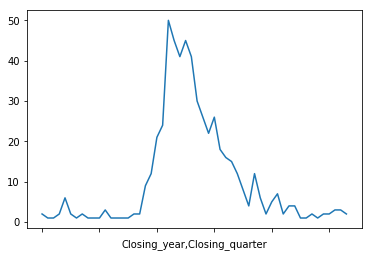

In [143]:
#연도별로 파산한 은행이 몇개인지 출력
closing_year=banks.groupby('Closing_year').size()
closing_year

#연도별로 그룹화한 다음, 다시 분기별로 그룹화를 해서 출력

closing_yearNquarter=banks.groupby(['Closing_year','Closing_quarter']).size()
#closing_yearNquarter
fig,ax=plt.subplots()
ax=closing_year.plot()
plt.show()

fig,ax=plt.subplots()
ax=closing_yearNquarter.plot()
plt.show()

In [153]:
#tesla=pdr.get_data_quandl('TSLA')

In [170]:
tesla=pd.read_csv('data/TSLA.csv')

In [173]:
tesla['new_date']=pd.to_datetime(tesla['Date'])

In [175]:
tesla.index=tesla['new_date'] #index를 datetime으로 변환후

In [191]:
print(tesla.loc['2015-01-02': '2015-01-17']) #2015년도 1월달 데이터를 모두 추출
#인덱스가 문자열이면 데이터 추출 불가

print(tesla.iloc[:5, :5])

                  Date        Open        High         Low       Close  \
new_date                                                                 
2015-01-02  2015-01-02  222.869995  223.250000  213.259995  219.309998   
2015-01-05  2015-01-05  214.550003  216.500000  207.160004  210.089996   
2015-01-06  2015-01-06  210.059998  214.199997  204.210007  211.279999   
2015-01-07  2015-01-07  213.350006  214.779999  209.779999  210.949997   
2015-01-08  2015-01-08  212.809998  213.800003  210.009995  210.619995   
2015-01-09  2015-01-09  208.919998  209.979996  204.960007  206.660004   
2015-01-12  2015-01-12  203.050003  204.470001  199.250000  202.210007   
2015-01-13  2015-01-13  203.320007  207.610001  200.910004  204.250000   
2015-01-14  2015-01-14  185.830002  195.199997  185.000000  192.690002   
2015-01-15  2015-01-15  194.490005  195.750000  190.000000  191.869995   
2015-01-16  2015-01-16  190.699997  194.490005  189.649994  193.070007   

             Adj Close    Volume   ne

In [204]:
#시간 범위를 생성하여 인덱스로 지정하는 방법
#특정일에 누락된 데이터를 포함하여 데이터를 검색하고자 할때...

ebola=pd.read_csv("data/country_timeseries.csv", parse_dates=[0])
#ebola.iloc[-5:,:5] #하위 5개
#ebola.index=ebola['Date']
ebola


DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')

In [205]:
head_range=pd.date_range(start='2014-12-31', end='2015-01-05') #특정 기간에 해당되는 시간 인덱스를 생성.
head_range

DatetimeIndex(['2014-12-31', '2015-01-01', '2015-01-02', '2015-01-03',
               '2015-01-04', '2015-01-05'],
              dtype='datetime64[ns]', freq='D')

In [211]:
ebola_5=ebola.head() #2015년 1월 5일 ~ 2014년 12월 31일
ebola_5.index=ebola_5['Date']
ebola_5.reindex(head_range) #기존에 존재하지 않았던 인덱스에 대해서 reindex를 하게되면
                            #그 자리에 NaN이 입력된다.

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
2014-12-31,2014-12-31,284.0,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
2015-01-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,286.0,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-03,2015-01-03,287.0,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
2015-01-04,2015-01-04,288.0,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2015-01-05,2015-01-05,289.0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN


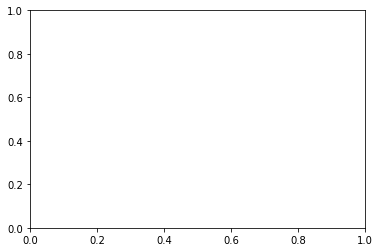

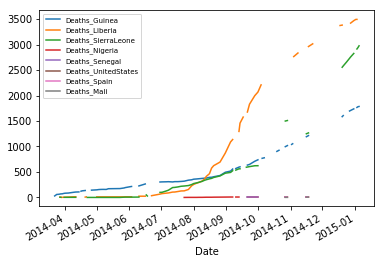

In [219]:
#에볼라의 확산 속도 나라별로 비교
#시간 흐름에 따라 국가별로 발병 정도를 시각화

ebola.index=ebola['Date']
fig,ax=plt.subplots()
ax=ebola.iloc[0:, 10:].plot()
ax.legend(fontsize=7, loc=2)
plt.show()

In [231]:
ebola_sub=ebola[['Day','Cases_Guinea', 'Cases_Liberia']]
ebola_sub.tail(10)
new_idx=pd.date_range(ebola.index.min(), ebola.index.max())
new_idx
#인덱스 순서가 ebola 데이터의 날짜와 반대이므로, reverse를 수행
new_idx=reversed(new_idx)
print(new_idx)
ebola.reindex(new_idx)
ebola

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
Date,,,,,,,,,,,,,,,,,,
2015-01-05,2015-01-05,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
2015-01-04,2015-01-04,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2015-01-03,2015-01-03,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
2015-01-02,2015-01-02,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,2014-12-31,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
2014-12-28,2014-12-28,281,2706.0,8018.0,9446.0,NaN,NaN,NaN,NaN,NaN,1708.0,3423.0,2758.0,NaN,NaN,NaN,NaN,NaN
2014-12-27,2014-12-27,280,2695.0,NaN,9409.0,NaN,NaN,NaN,NaN,NaN,1697.0,NaN,2732.0,NaN,NaN,NaN,NaN,NaN
2014-12-24,2014-12-24,277,2630.0,7977.0,9203.0,NaN,NaN,NaN,NaN,NaN,NaN,3413.0,2655.0,NaN,NaN,NaN,NaN,NaN
2014-12-21,2014-12-21,273,2597.0,NaN,9004.0,NaN,NaN,NaN,NaN,NaN,1607.0,NaN,2582.0,NaN,NaN,NaN,NaN,NaN
